In [1]:
# Importing libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
import statsmodels.formula.api as smf7

### Cab_Data EDA

In [2]:
cab_read = pd.read_csv("Cab_Data.csv")
cab_df = cab_read.copy()
cab_df = cab_df.dropna()
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


Data of Travel column is corrected by date.

In [4]:
%%time
from datetime import datetime
import xlrd

cab_df["Date of Travel"] = cab_df["Date of Travel"].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))

Wall time: 2.69 s
Compiler : 470 ms


In [5]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
print("There are {} rows and {} columns".format(cab_df.shape[0], cab_df.shape[1]))

There are 359392 rows and 7 columns


In [7]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


In [8]:
cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [9]:
cab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [10]:
cab_df.describe(include = "all").T

<ipython-input-10-2e7e4ba039a4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cab_df.describe(include = "all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,NaN,NaN,NaN,NaT,NaT,10220761.185363,126805.803715,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0
Date of Travel,359392,1095,2018-01-05 00:00:00,2022,2016-01-02,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,359392,2,Yellow Cab,274681,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,359392,19,NEW YORK NY,99885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM Travelled,359392.0,NaN,NaN,NaN,NaT,NaT,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
Price Charged,359392.0,NaN,NaN,NaN,NaT,NaT,423.443311,274.378911,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,NaN,NaN,NaN,NaT,NaT,286.190113,157.993661,19.0,151.2,282.48,413.6832,691.2


In [11]:
cab_df.isnull().values.any()

False

In [12]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

#### Categorical Value "City"  

In [13]:
cab_df.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [14]:
cab_df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [15]:
cab_df["City"].value_counts().count()

19

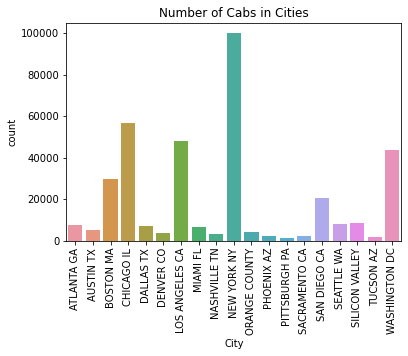

In [16]:
graphic = sns.countplot(x="City", data = cab_df);
plt.xticks(rotation=90);
plt.rcParams["figure.figsize"] = (12,5)
graphic.set_title("Number of Cabs in Cities");


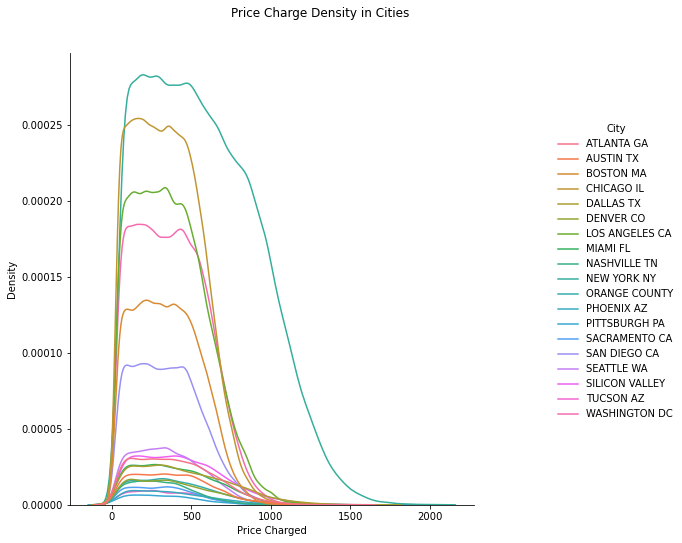

In [17]:
rp = sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="City");
rp.fig.set_size_inches(10,8)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle("Price Charge Density in Cities");


According to cab_df the most numbers is New York.

#### Categorical Value "Company"  

In [18]:
cab_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [19]:
cab_df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

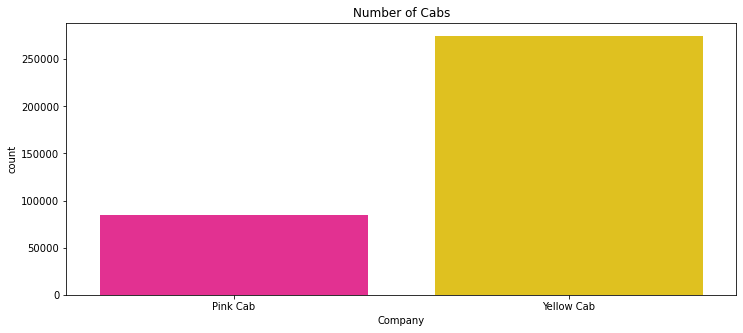

In [20]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="Company", data = cab_df);

plt.rcParams["figure.figsize"] = (6,3)
grap1.set_title("Number of Cabs");


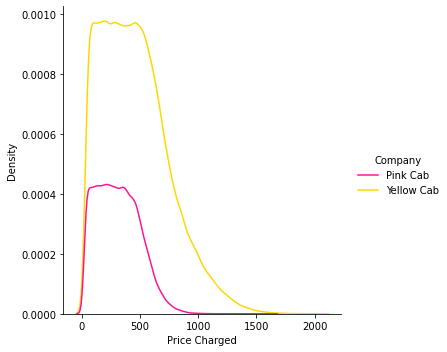

In [21]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="Company");

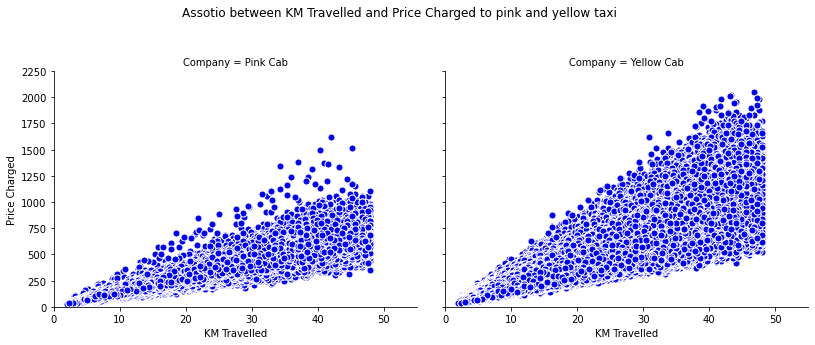

In [22]:
grap2 = sns.FacetGrid(cab_df, col="Company", margin_titles=True, height=4)
grap2.map(plt.scatter, "KM Travelled", "Price Charged", color="blue", edgecolor="white", s=50, lw=1)
grap2.set(xlim=(0, 55), ylim=(0, 2250));
grap2.fig.set_size_inches(12,5)
grap2.fig.subplots_adjust(top=.8) 
grap2.fig.suptitle("Assotio between KM Travelled and Price Charged to pink and yellow taxi");

In terms of the KM Travelled and Price Charged, it is seen that the yellow taxi travels more.

### City EDA

In [23]:
city_read = pd.read_csv("City.csv")
city_df = city_read.copy()
city_df = city_df.dropna()
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
print("There are {} rows and {} columns".format(city_df.shape[0], city_df.shape[1]))

There are 20 rows and 3 columns


In [25]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 640.0+ bytes


In [26]:
city_df.dtypes

City          object
Population    object
Users         object
dtype: object

In [27]:
city_df["Users"] = city_df["Users"].replace(',','.', regex=True).astype(float)
city_df["Population"] = city_df["Population"].replace(',','', regex=True).astype(float)

In [28]:
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

Users and Population values changed from object to float.

#### Continuous Variable Summaries

In [29]:
city_df1 = city_df.select_dtypes(include = ["float64"])

In [30]:
city_df1.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1.231592e+06,1.740127e+06,248968.000,608637.25000,784559.000,1067041.000,8405837.000
Users,20.0,6.452065e+01,8.349938e+01,3.643,11.63325,23.429,91.766,302.149


In [31]:
city_df1.head()

,Population,Users
0,8405837.0,302.149
1,1955130.0,164.468
2,1595037.0,144.132
3,1339155.0,17.675
4,1177609.0,27.247


In [32]:
city_df1.isnull().values.any()

False

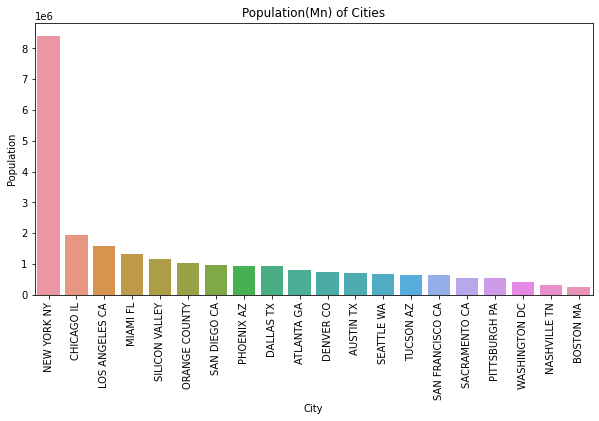

In [33]:
plt.figure(figsize = (10,5))
cities_ = sns.barplot(x="City",y="Population", data=city_df);
plt.setp(cities_.get_xticklabels(), rotation=90);
cities_ .set_title("Population(Mn) of Cities");

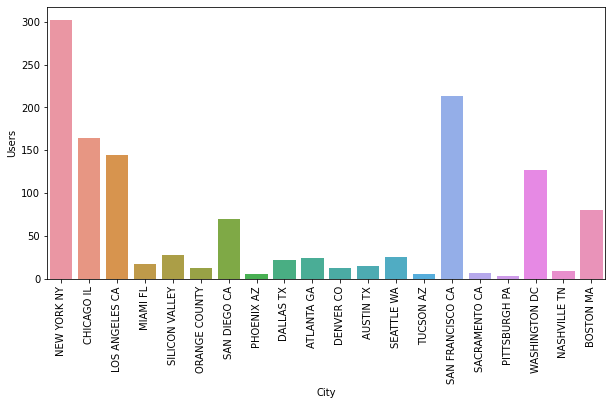

In [34]:
plt.figure(figsize = (10,5))
cities_ = sns.barplot(x="City",y="Users", data=city_df);
plt.setp(cities_.get_xticklabels(), rotation=90);

According to my research, between 2016-2018, Los Angeles had more population than Chicago. 
This problem Orange Country and Silicon Valley, which also appear here, are actually cities of the state of CA.
This will be fixed when all files are merged.


###  Customer_ID EDA

In [35]:
customer_read = pd.read_csv("Customer_ID.csv")
customer_df = customer_read.copy()
customer_df = customer_df.dropna()
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [36]:
print("There are {} rows and {} columns".format(customer_df.shape[0], customer_df.shape[1]))

There are 49171 rows and 4 columns


In [37]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [38]:
customer_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [39]:
customer_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,NaN,NaN,NaN,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Gender,49171,2,Male,26562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,49171.0,NaN,NaN,NaN,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,NaN,NaN,NaN,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [40]:
customer_df.isnull().values.any()

False

In [41]:
customer_df.rename(columns = {'Income (USD/Month)' : 'Customer_Income'}, inplace = True)
customer_df.head()

,Customer ID,Gender,Age,Customer_Income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [42]:
customer_df["Gender"].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### Transaction_ID EDA

In [43]:
transaction_read = pd.read_csv("Transaction_ID.csv")
transaction_df = transaction_read.copy()
transaction_df = transaction_df.dropna()
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [44]:
print("There are {} rows and {} columns".format(transaction_df.shape[0], transaction_df.shape[1]))

There are 440098 rows and 3 columns


In [45]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [46]:
transaction_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [47]:
transaction_df["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [48]:
transaction_df["Customer ID"].value_counts()

494      54
2939     53
2766     51
1070     51
2539     50
         ..
14539     1
54040     1
26470     1
32613     1
23303     1
Name: Customer ID, Length: 49171, dtype: int64

### Merge of all files 

In [49]:
df = pd.merge(cab_df, transaction_df, 
         on='Transaction ID', 
         how="inner") #remoted missing value
df.head()  

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     359392 non-null  int64         
 8   Payment_Mode    359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.4+ MB


In [51]:
df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

In [52]:
df1 = pd.merge(df, customer_df, 
         on='Customer ID', 
         how="inner") #remoted missing value
df1 = df1.copy()

df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  int64         
 1   Date of Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM Travelled     359392 non-null  float64       
 5   Price Charged    359392 non-null  float64       
 6   Cost of Trip     359392 non-null  float64       
 7   Customer ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [54]:
df1.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
dtype: int64

In [55]:
df2 = pd.merge(df1, city_df, 
         on='City', 
         how="inner") #remoted missing value
all_df = df2.copy()

all_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701


### all_df EDA

In [56]:
all_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701


In [57]:
print("There are {} rows and {} columns".format(all_df.shape[0],all_df.shape[1]))

There are 359392 rows and 14 columns


In [58]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  int64         
 1   Date of Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM Travelled     359392 non-null  float64       
 5   Price Charged    359392 non-null  float64       
 6   Cost of Trip     359392 non-null  float64       
 7   Customer ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
dtypes: datetime64[ns](1)

In [59]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,1.268058e+05,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,2.743789e+02,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer ID,359392.0,1.919165e+04,2.101241e+04,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,1.259423e+01,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Customer_Income,359392.0,1.504882e+04,7.969409e+03,2.000000e+03,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04
Population,359392.0,3.132198e+06,3.315194e+06,2.489680e+05,6.712380e+05,1.595037e+06,8.405837e+06,8.405837e+06
Users,359392.0,1.583656e+02,1.008501e+02,3.643000e+00,8.002100e+01,1.441320e+02,3.021490e+02,3.021490e+02


In [60]:
all_df.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
Population         0
Users              0
dtype: int64

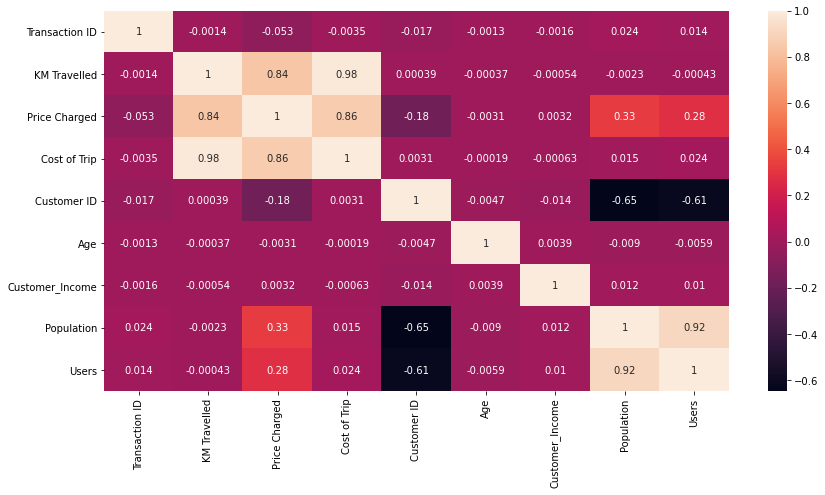

In [61]:
plt.figure(figsize = (14,7))
sns.heatmap(all_df.corr(), annot = True);

### Analysis of Categorical Values 

In [62]:
all_df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

SILICON VALLEY and ORANGE COUNTY are cities of CA state. This cities has been renamed as SILICON_VALLEY CA and ORANGE_COUNTY CA. 

In [63]:
all_df["City"] = all_df["City"].replace(["SILICON VALLEY"],"SILICON_VALLEY CA")
all_df["City"] = all_df["City"].replace(["ORANGE COUNTY"],"ORANGE_COUNTY CA")

In [64]:
all_df["City"].value_counts()

NEW YORK NY          99885
CHICAGO IL           56625
LOS ANGELES CA       48033
WASHINGTON DC        43737
BOSTON MA            29692
SAN DIEGO CA         20488
SILICON_VALLEY CA     8519
SEATTLE WA            7997
ATLANTA GA            7557
DALLAS TX             7017
MIAMI FL              6454
AUSTIN TX             4896
ORANGE_COUNTY CA      3982
DENVER CO             3825
NASHVILLE TN          3010
SACRAMENTO CA         2367
PHOENIX AZ            2064
TUCSON AZ             1931
PITTSBURGH PA         1313
Name: City, dtype: int64

We arrange cities before we can sort

In [65]:
all_df["City"] = all_df["City"].replace(["NEW YORK NY"],"NEW_YORK NY")
all_df["City"] = all_df["City"].replace(["LOS ANGELES CA"],"LOS_ANGELES CA")
all_df["City"] = all_df["City"].replace(["SAN DIEGO CA"],"SAN_DIEGO CA")



In [66]:
all_df["States"] = all_df["City"].apply(lambda x: x.split(" ")[1])
all_df["States"].value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: States, dtype: int64

In [67]:
all_df.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
Population         0
Users              0
States             0
dtype: int64

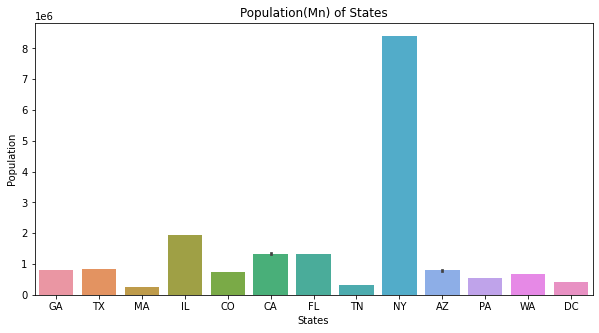

In [68]:
plt.figure(figsize = (10,5))
graph3 = sns.barplot(x="States",y="Population",  data=all_df);
graph3.set_title("Population(Mn) of States");

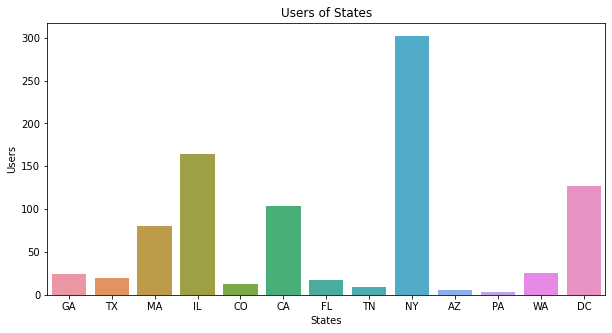

In [69]:
plt.figure(figsize = (10,5))
graph3 = sns.barplot(x="States",y="Users", data=all_df);
graph3.set_title("Users of States");

In [70]:
all_df.rename({"City": "States_Cities"}, axis=1, inplace=True) #rename "City" column.
all_df

,Transaction ID,Date of Travel,Company,States_Cities,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127.001,DC
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127.001,DC
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127.001,DC
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127.001,DC


In [71]:
all_df["Cities"] = all_df["States_Cities"].apply(lambda x: x.split(" ")[0])
all_df["Cities"].value_counts()

NEW_YORK          99885
CHICAGO           56625
LOS_ANGELES       48033
WASHINGTON        43737
BOSTON            29692
SAN_DIEGO         20488
SILICON_VALLEY     8519
SEATTLE            7997
ATLANTA            7557
DALLAS             7017
MIAMI              6454
AUSTIN             4896
ORANGE_COUNTY      3982
DENVER             3825
NASHVILLE          3010
SACRAMENTO         2367
PHOENIX            2064
TUCSON             1931
PITTSBURGH         1313
Name: Cities, dtype: int64

In [72]:
for col in all_df.columns:
    if ' ' in col:
        all_df = all_df.rename(columns={col:col.replace(' ','_')})
all_df

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON


#### Add Years, Months and Years_Months Columns

In [73]:
all_data = all_df.copy()
all_data['Years'] = pd.DatetimeIndex(all_data['Date_of_Travel']).year
all_data['Months_Number'] = pd.DatetimeIndex(all_data['Date_of_Travel']).month
all_data['Years_Months'] = pd.to_datetime(all_data['Date_of_Travel']).dt.to_period('M')

all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04


In [74]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

In [75]:
d = {1:"JAN", 2:"FEB", 3:"MAR", 4:"APR",
    5:"MAY", 6:"JUN", 7:"JULY", 8:"AUG",
    9: "SEP", 10:"OCT",11:"NOV", 12:"DEC"}

all_data["Months"] = all_data.Months_Number.map(d)

all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR


In [76]:
all_data["Profit"] = all_data["Price_Charged"] - all_data["Cost_of_Trip"]   
all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


In [77]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

In [78]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,359392.0,1.022076e+07,1.268058e+05,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM_Travelled,359392.0,2.256725e+01,1.223353e+01,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price_Charged,359392.0,4.234433e+02,2.743789e+02,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost_of_Trip,359392.0,2.861901e+02,1.579937e+02,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer_ID,359392.0,1.919165e+04,2.101241e+04,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,1.259423e+01,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Customer_Income,359392.0,1.504882e+04,7.969409e+03,2.000000e+03,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04
Population,359392.0,3.132198e+06,3.315194e+06,2.489680e+05,6.712380e+05,1.595037e+06,8.405837e+06,8.405837e+06
Users,359392.0,1.583656e+02,1.008501e+02,3.643000e+00,8.002100e+01,1.441320e+02,3.021490e+02,3.021490e+02
Years,359392.0,2.017045e+03,8.002392e-01,2.016000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.018000e+03


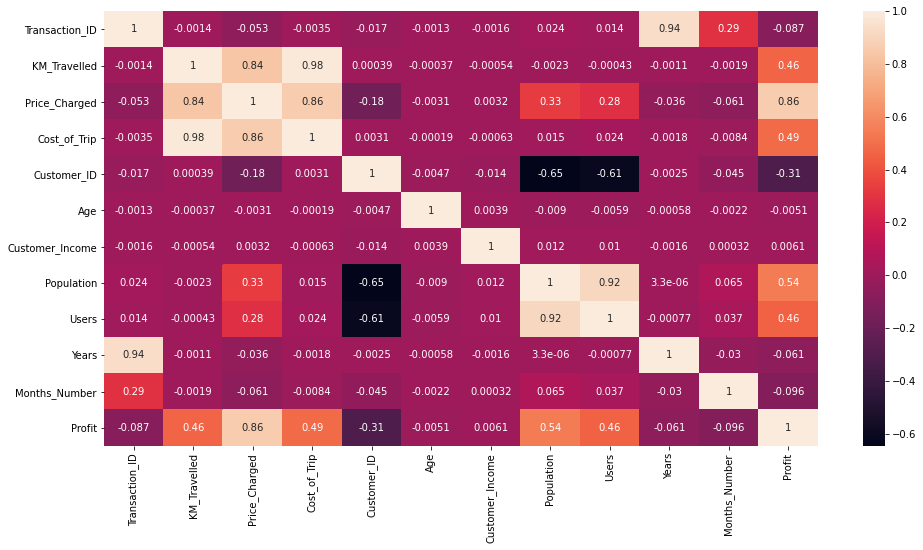

In [79]:
plt.figure(figsize = (16,8))
sns.heatmap(all_data.corr(), annot = True);

### Missing Value

In [80]:
print('Missing data')
for col in all_df1['Company KM_Travelled Price_Charged Users Profit Cities Years Payment_Mode Age Gender Customer_ID  Transaction_ID'.split()].columns:
    missing = pd.isnull(all_df1[col]).sum() # returns the total no. of empty entries in the column
    pct = round(missing/359392*100, 1) 
    print(f'\t{col}: \t{missing} ({pct}%)')

Missing data


NameError: name 'all_df1' is not defined

### Outliers

In [ ]:
all_df1 = all_data.copy()
all_df1

In [ ]:
all_df1.info()

In [ ]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
sns.boxplot(data=all_df1, x="Company", y="Price_Charged");

fig.add_subplot(rows, columns, 2)
sns.boxplot(data=all_df1, x="Company", y="Cost_of_Trip");

fig.add_subplot(rows, columns, 3)
sns.boxplot(data=all_df1, x="Company", y="Profit");

In [ ]:
color = ["mediumspringgreen","purple"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(10, 5))
from scipy.stats import norm
plt.hist(all_df1.Price_Charged, bins=30, rwidth=0.8, density= True)
plt.xlabel("Price_Charged($)")
plt.ylabel("Density")

rng = np.arange(all_df1.Price_Charged.min(), all_df1.Price_Charged.max(), 0.1)
plt.plot(rng, norm.pdf(rng, all_df1.Price_Charged.median(), all_df1.Price_Charged.std()));

In [ ]:
max_threshold = all_df1["Price_Charged"].quantile(0.75)
min_threshold = all_df1["Price_Charged"].quantile(0.25)
IQR = max_threshold-min_threshold
IQR

In [ ]:
max_threshold = all_df1["Price_Charged"].quantile(0.75)
min_threshold = all_df1["Price_Charged"].quantile(0.25)
print("max_threshold", max_threshold) 
print("min_threshold", min_threshold)
min_threshold

In [ ]:
lower_bound = min_threshold-1.5*IQR
upper_bound = max_threshold+1.5*IQR
print("lower_bound", lower_bound) 
print("upper_bound", upper_bound)


In [ ]:
color = ["mediumspringgreen","purple"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(10, 5))
from scipy.stats import norm
plt.hist(all_df1.Cost_of_Trip, bins=30, rwidth=0.8, density= True)
plt.xlabel("Cost_of_Trip($)")
plt.ylabel("Density")

rng = np.arange(all_df1.Cost_of_Trip.min(), all_df1.Cost_of_Trip.max(), 0.1)
plt.plot(rng, norm.pdf(rng, all_df1.Cost_of_Trip.median(), all_df1.Cost_of_Trip.std()));

In [ ]:
color = ["mediumspringgreen","purple"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(10, 5))
fig = plt.figure(figsize=(10, 5))

from scipy.stats import norm
plt.hist(all_df1.Profit, bins=30, rwidth=0.8, density= True);
plt.xlabel("Profit")
plt.ylabel("Density")

rng = np.arange(all_df1.Profit.min(), all_df1.Profit.max(), 0.1);
plt.plot(rng, norm.pdf(rng, all_df1.Profit.median(), all_df1.Profit.std()));

There seems to be a moment when the profit density is negative and quite high. The reason for this must be found.

Median calculate because profit outlier situation.

In [ ]:
q1 =all_data.copy()
q1 = q1[["Months_Number","Months","Years","Company","Profit","States"]]
q1

In [ ]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=q1, x=q1["Company"], y="Profit",  hue = q1["Months_Number"]);

In [ ]:
fig = plt.figure(figsize=(12, 6))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=q1, x=q1["Company"], y="Profit",  hue = q1["Years"]);

In [ ]:
q1_profit = q1.copy()
q1_profit = q1_profit[q1_profit["Profit"]> 0]
q1_profit.head()

In [ ]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=q1_profit, x=q1_profit["Company"], y="Profit",  hue = q1_profit["States"]);

In [ ]:
q1_loss = q1.copy()
q1_loss = q1_loss[q1_loss["Profit"]<= 0]
q1_loss.head()

In [ ]:
q1_loss.sort_values(by=["Months_Number"])

In [ ]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)

sns.boxplot(data=q1_loss, x=q1_loss["Company"], y="Profit",  hue = q1_loss["Months_Number"]);

In [ ]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=q1_loss, x=q1_loss["Company"], y="Profit",  hue = q1_loss["Years"]);

In [ ]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=q1_loss, x=q1_loss["Company"], y="Profit",  hue = q1_loss["States"]);

Both companies have losses. But Yellow Cab have not been lost loss at NY. 

New York city is the most profitable city according to Yellow Cab.

I realized that the graphs above are misleading. Because in the case of "profit" it actually has negative values.

<Figure size 1152x576 with 0 Axes>

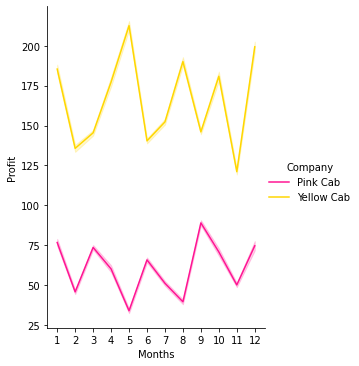

In [81]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(16, 8))

graph1 = sns.relplot(
    data=all_data,
    x=all_data["Months"], y="Profit",
    hue="Company",
    kind="line", 
    height=5, aspect=.75, facet_kws=dict(sharex=False));

graph1.set_xticklabels(np.arange(1,13,1));


When the general profit situation is examined actually both companies make a profit. 

In [82]:
all_data1 = all_data.copy()
all_data1.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


### Age

In [83]:
all_data1["Age_band"]=0

all_data1.loc[(all_data1["Age"]>=18)&(all_data1["Age"]<=39),"Age_band"]="Young Adults"
all_data1.loc[(all_data1["Age"]>=40)&(all_data1["Age"]<=59),"Age_band"]="Middle-aged Adults"
all_data1.loc[(all_data1["Age"]>=60)&(all_data1["Age"]<=99),"Age_band"]="Old Adults"
all_data1.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit,Age_band
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150,Young Adults
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772,Young Adults
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480,Young Adults
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660,Young Adults
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808,Young Adults


C:\Users\melis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


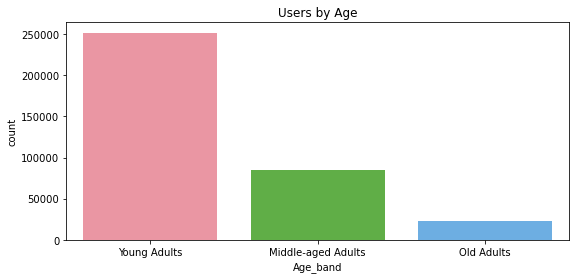

In [84]:
plt.figure(figsize = (9,4))
ax = sns.countplot(all_data1.Age_band).set_title("Users by Age");


In [85]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(11, 5))
fig.add_subplot(rows, columns, 1)
sns.boxplot(data=all_data1, x=all_data1["Age_band"], y="Profit",  hue = all_data1["Company"]);

NameError: name 'rows' is not defined

<Figure size 792x360 with 0 Axes>

## Male & Female

In [ ]:
color = ["teal", "purple"]
sns.set_palette(sns.color_palette(color))
print(f"Proportion of Total Male: {all_data1.Gender.value_counts(normalize = True)[0]*100:.1f} %")
print(f"Proportion of Total Female: {all_data1.Gender.value_counts(normalize = True)[1]*100:.1f} %")
plt.figure(figsize = (9,4))
ax = sns.countplot(all_data1.Gender).set_title("Users by Gender");


In [ ]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="Gender", y="Profit", hue="Company", data=all_data1);

In [ ]:
fig = plt.figure(figsize=(11, 5))
rows = 1
columns = 1


fig.add_subplot(rows, columns, 1)
sns.boxplot(data=all_data, x=all_data["Gender"], y="Profit",  hue = all_data["Company"]);

In [ ]:
color = ["teal", "purple"]
sns.set_palette(sns.color_palette(color))
g = sns.FacetGrid(all_data, col="Company", hue = "Gender")
g.map(sns.scatterplot, "Profit", "Age")
g.add_legend();
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=.9) 
g.fig.suptitle("Distribution between Age and Profit to pink and yellow taxi");

In [ ]:
gender_df = all_data1.groupby(["Company", "Gender"]).size().reset_index().\
                                                    rename(columns = {0:"Gender_Count"})
gender_df

## Card & Cash

In [86]:
card_cash_df= all_data.groupby(["Cities","States","Payment_Mode"]).size().reset_index().rename(columns = {0 : "Pay_Mode_Count"})

card_cash_df.head()

,Cities,States,Payment_Mode,Pay_Mode_Count
0,ATLANTA,GA,Card,4513
1,ATLANTA,GA,Cash,3044
2,AUSTIN,TX,Card,2980
3,AUSTIN,TX,Cash,1916
4,BOSTON,MA,Card,17741


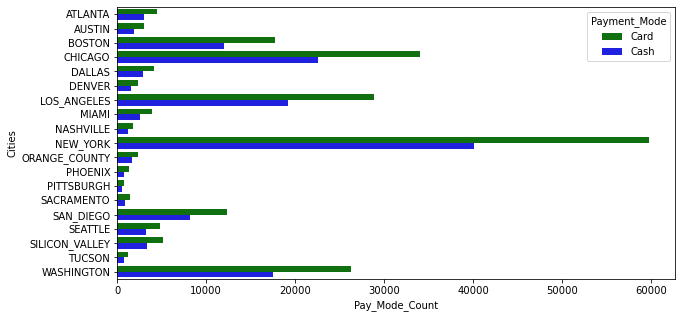

In [87]:
color = ["green", "blue"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="Pay_Mode_Count", y="Cities", hue="Payment_Mode", data=card_cash_df);

Proportion of Total Users Card: 59.963 %
Proportion of Total Users Cash: 40.037 %


C:\Users\melis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


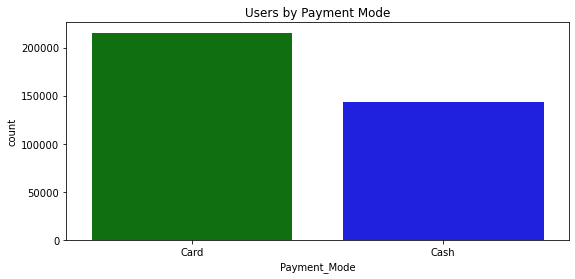

In [88]:
color = ["green", "blue"]
sns.set_palette(sns.color_palette(color))
print(f"Proportion of Total Users Card: {all_data1.Payment_Mode.value_counts(normalize = True)[0]*100:.3f} %")
print(f"Proportion of Total Users Cash: {all_data1.Payment_Mode.value_counts(normalize = True)[1]*100:.3f} %")
plt.figure(figsize = (9,4))
sns.countplot(all_data1.Payment_Mode).set_title("Users by Payment Mode");

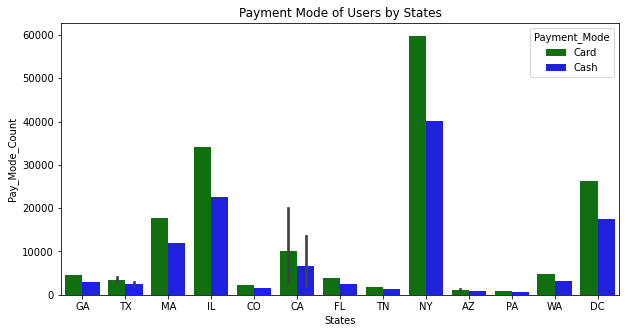

In [89]:
color = ["green", "blue"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="States", y="Pay_Mode_Count", hue="Payment_Mode", data=card_cash_df).set_title("Payment Mode of Users by States");  

Card use predominates in all states.

In [90]:
company_card_cash_df= all_data.groupby(["Company","Payment_Mode"]).size().reset_index().rename(columns = {0 : "Company_Pay_Mode_Count"})

company_card_cash_df.head()

,Company,Payment_Mode,Company_Pay_Mode_Count
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


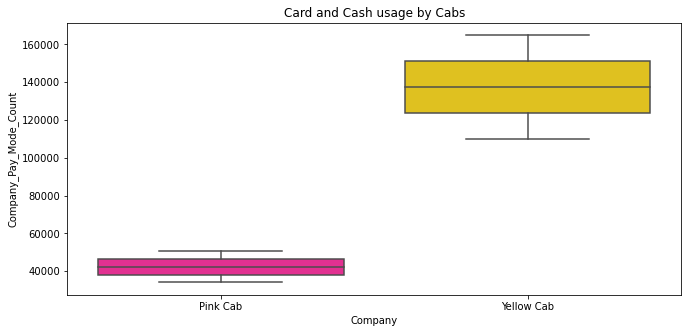

In [91]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(11, 5))

sns.boxplot(data=company_card_cash_df,
            x="Company",
            y=company_card_cash_df["Company_Pay_Mode_Count"]).set_title("Card and Cash usage by Cabs");

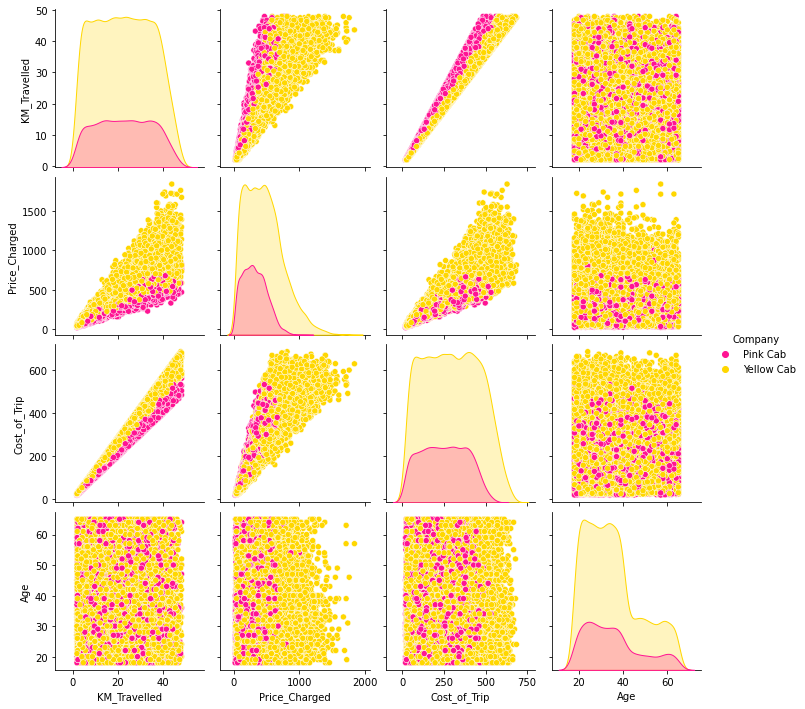

In [92]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
q7 = all_data[["KM_Travelled",
               "Price_Charged",
               "Cost_of_Trip",
               "Age",
               "Company"]].sample(frac = 0.05, random_state = 42);
sns.pairplot(q7, hue="Company", hue_order = ["Pink Cab", "Yellow Cab"], height = 2.5);

Next, we will look at the distributions of the rest of the features in all_data: Profit, KM_Travelled,
Users, Cities and Company

It is seen that the yellow taxi is more dominant in general.

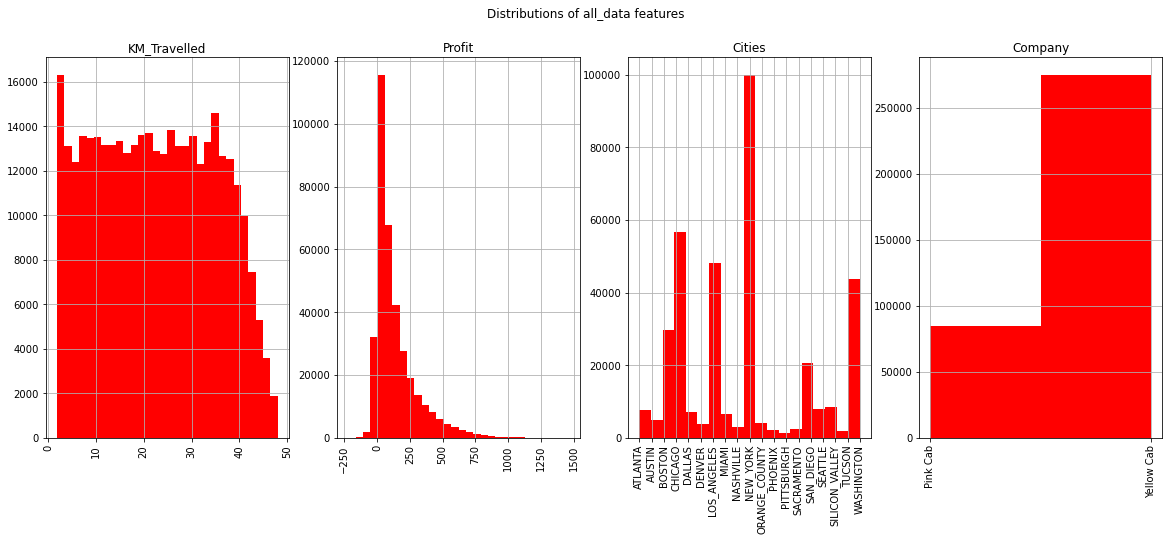

In [93]:
color = ["red"]
sns.set_palette(sns.color_palette(color))
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
for i, col in enumerate('KM_Travelled Profit Cities Company'.split()):
    all_data[col].hist(xrot=90, ax=axes[i], bins=min(30, len(all_data[col].unique())))
    axes[i].set_title(col)
fig.suptitle('Distributions of all_data features');

<AxesSubplot:xlabel='Company', ylabel='Population'>

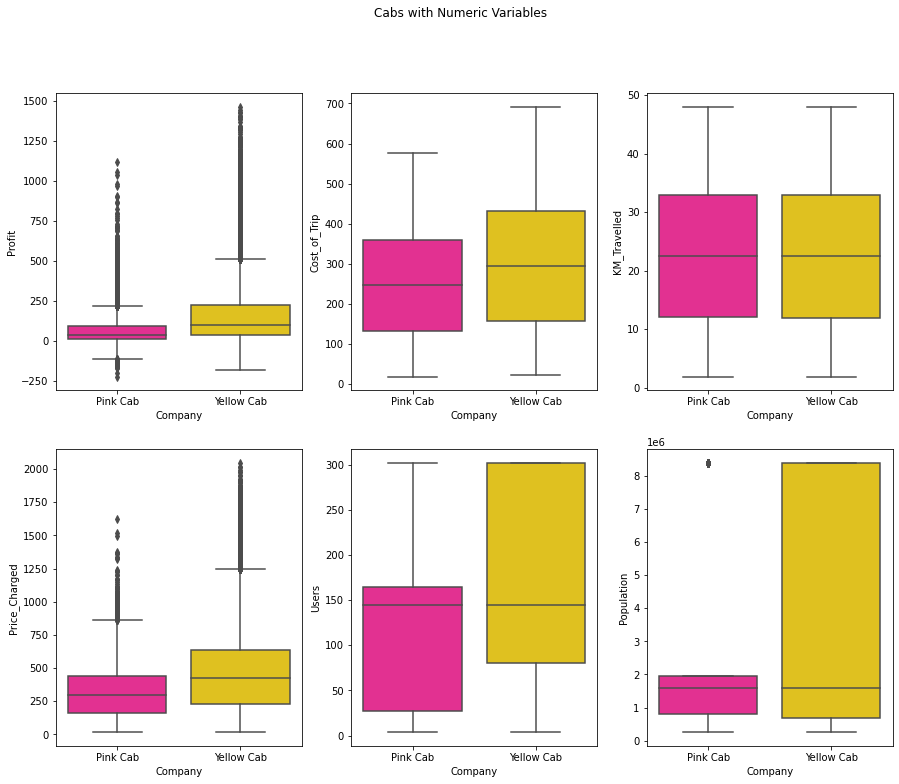

In [94]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
  
fig.suptitle("Cabs with Numeric Variables");
  
sns.boxplot(ax=axes[0, 0], data=all_data, x="Company", y="Profit")
sns.boxplot(ax=axes[0, 1], data=all_data, x="Company", y="Cost_of_Trip")
sns.boxplot(ax=axes[0, 2], data=all_data, x="Company", y="KM_Travelled")
sns.boxplot(ax=axes[1, 0], data=all_data, x="Company", y="Price_Charged")
sns.boxplot(ax=axes[1, 1], data=all_data, x="Company", y="Users")
sns.boxplot(ax=axes[1, 2], data=all_data, x="Company", y="Population")


## Statistical Analysis

In [95]:
all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


In [96]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

In [97]:
!pip install researchpy
import researchpy as rp

  Using cached researchpy-0.3.2-py3-none-any.whl (15 kB)


In [98]:
rp.summary_cont(all_data[["KM_Travelled","Price_Charged","Cost_of_Trip","Profit"]]) 
#numeric variable

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,KM_Travelled,359392.0,22.5673,12.2335,0.0204,22.5273,22.6073
1,Price_Charged,359392.0,423.4433,274.3789,0.4577,422.5463,424.3404
2,Cost_of_Trip,359392.0,286.1901,157.9937,0.2635,285.6736,286.7067
3,Profit,359392.0,137.2532,160.3118,0.2674,136.7291,137.7773


In [99]:
import scipy.stats as stats
import pylab

In [100]:
stats.describe(all_data["Price_Charged"])

DescribeResult(nobs=359392, minmax=(15.6, 2048.03), mean=423.4433112590153, variance=75283.78704639869, skewness=0.8737578448085501, kurtosis=0.7476083770138593)

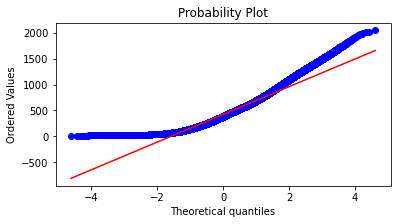

In [101]:
stats.probplot(all_data["Price_Charged"], dist="norm", plot=pylab)
pylab.show()

In [102]:
stats.describe(all_data["Cost_of_Trip"])

DescribeResult(nobs=359392, minmax=(19.0, 691.2), mean=286.19011282443677, variance=24961.996964134534, skewness=0.13795748511098127, kurtosis=-1.0122353643193263)

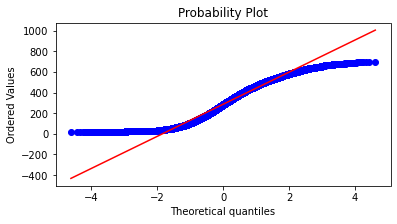

In [103]:
stats.probplot(all_data["Cost_of_Trip"], dist="norm", plot=pylab)
pylab.show()

In [104]:
stats.describe(all_data["Profit"])

DescribeResult(nobs=359392, minmax=(-220.06, 1463.9660000000003), mean=137.25319843457842, variance=25699.88591852702, skewness=1.8998960015626842, kurtosis=4.376834715546553)

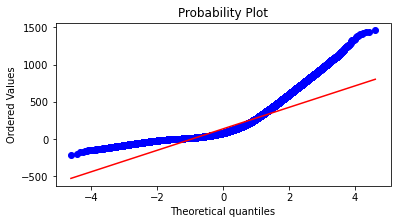

In [105]:
import pylab
stats.probplot(all_data["Profit"], dist="norm", plot=pylab)
pylab.show()

In [106]:
from scipy.stats import shapiro


In [107]:
shapiro(all_data["Price_Charged"])

C:\Users\melis\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9465863108634949, pvalue=0.0)

In [108]:
stats.ttest_1samp(all_data["Price_Charged"], popmean=500)

Ttest_1sampResult(statistic=-167.26944461251136, pvalue=0.0)

In [109]:
from scipy.stats import kruskal
kruskal(all_data["Price_Charged"], all_data["Cost_of_Trip"],all_data["Profit"])

KruskalResult(statistic=305580.54944824, pvalue=0.0)

### Correlation Analysis

In [110]:
all_data1 = all_data.copy()
_df = all_data1[["KM_Travelled", "Price_Charged", "Cost_of_Trip", "Profit"]]
_df

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,30.45,370.95,313.6350,57.3150
1,26.19,598.70,317.4228,281.2772
2,42.55,792.05,597.4020,194.6480
3,28.62,358.52,334.8540,23.6660
4,36.38,721.10,467.1192,253.9808
...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180
359388,3.57,67.60,44.5536,23.0464
359389,23.46,331.97,337.8240,-5.8540
359390,27.60,358.23,364.3200,-6.0900


In [111]:
_df.isnull().values.any()

False

In [112]:
_df.describe().T

,count,mean,std,min,25%,50%,75%,max
KM_Travelled,359392.0,22.567254,12.233526,1.90,12.0000,22.440,32.9600,48.000
Price_Charged,359392.0,423.443311,274.378911,15.60,206.4375,386.360,583.6600,2048.030
Cost_of_Trip,359392.0,286.190113,157.993661,19.00,151.2000,282.480,413.6832,691.200
Profit,359392.0,137.253198,160.311840,-220.06,28.0120,81.962,190.0300,1463.966


In [113]:
_df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
KM_Travelled,1.000000,0.835753,0.981848,0.462768
Price_Charged,0.835753,1.000000,0.859812,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,0.486056
Profit,0.462768,0.864154,0.486056,1.000000


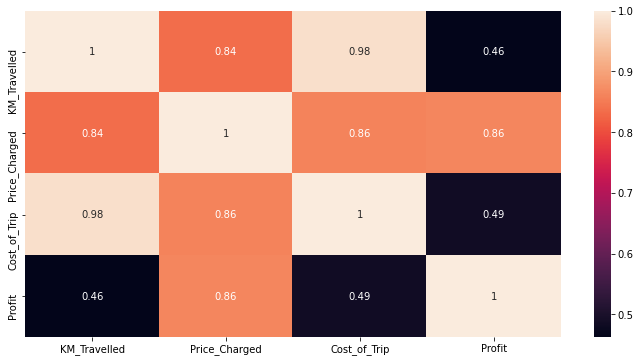

In [114]:
plt.figure(figsize = (12,6))
sns.heatmap(_df.corr(), annot = True);

## Hypothesis_Testing

Classical Hypothesis Testing
We want to answer this question: "given a sample and a apparent effecti what is the probability of seeing such an effect by chance"

The first step is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.

The second step is to define null hypothesis that is model of the system based on the assumption that the apparent effect is not real. A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. Alternative hypothesis is a hypothesis which people want to tries to prove it.

Third step is compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true. Suppose we have null hypothesis test. Then we calculate p value. If p value is less than or equal to a threshold, we reject null hypothesis.
If the p-value is low, the effect is said to be statistacally significant that means that it is unlikely to have occured by chance. Therefore we can say that the effect is more likely to appear in the larger population.

Lets have an example. Null hypothesis: world is flatten. Alternative hypothesis: world is round. Several scientists set out to disprove the null hypothesis. This eventually led to the refection of the null hypothesis and acceptance of the alternative hypothesis.

Other example. "this effect is real" this is null hypothesis. Based on that assumption we compute the probability of the apparent effect. That is the p-value. If p-value is low, we conclude that null hypothesis is unlikely to be true.
Now lets make our example:
I want to learn that are radius mean and area mean related with each other? My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.

Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)

Lets find p-value (probability value)

In [115]:
all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


In [116]:
# T-test to check dependency of Cabs on Profit
Ho = "Profit of Yellow Cab and Pink Cab are same"   # Stating the Null Hypothesis
H1 = "Profit of Yellow Cab and Pink Cab are not the same"   # Stating the Alternate Hypothesis

x = np.array(all_data[all_data.Company == "Yellow Cab"].Profit)  
y = np.array(all_data[all_data.Company == "Pink Cab"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value}) > 0.05")

Profit of Yellow Cab and Pink Cab are not the same as the p_value (0.0) < 0.05


P values is zero so we can reject null hypothesis. 

In [117]:
# T-test to check dependency of Profit on Gender
Ho = "Gender has no effect on profit"   # Stating the Null Hypothesis
H1 = "Gender has an effect on profit"   # Stating the Alternate Hypothesis

x = np.array(all_data[all_data.Gender == "Male"].Profit)  
y = np.array(all_data[all_data.Gender == "Female"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round()}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Gender has an effect on profit as the p_value (0.0) < 0.05


P values is zero so we can reject null hypothesis. 

In [118]:
# T-test to check dependency of Payment_Mode on Profit
Ho = "Payment_Mode has no effect on Profit"   # Stating the Null Hypothesis
H1 = "Payment_Mode has an effect on Profit"   # Stating the Alternate Hypothesis

x = np.array(all_data[all_data.Payment_Mode == "Cash"].Profit)  
y = np.array(all_data[all_data.Payment_Mode == "Card"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round()}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Payment_Mode has no effect on Profit as the p_value (0.445) > 0.05


P values isn't zero so we is not reject null hypothesis. 

In [119]:
# Chi_square test to check if Company are different for different genders
Ho = "Gender has no effect on Company"   # Stating the Null Hypothesis
H1 = "Gender has an effect on Company"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(all_data["Gender"], all_data["Company"])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Gender has an effect on Company as the p_value (0.0) < 0.05


Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


P values is zero so we can reject null hypothesis. 

In [120]:
Ho = "Date_of_Travel has no effect on Company"   # Stating the Null Hypothesis
H1 = "Date_of_Travel has an effect on Company"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(all_data["Date_of_Travel"], all_data["Company"])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Date_of_Travel has an effect on Company as the p_value (0.0) < 0.05


Company,Pink Cab,Yellow Cab
Date_of_Travel,,
2016-01-02,41,140
2016-01-03,52,126
2016-01-04,4,21
2016-01-05,6,41
2016-01-06,23,86
...,...,...
2018-12-27,66,252
2018-12-28,217,626
2018-12-29,195,630


P values is zero so we can reject null hypothesis.

In [121]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Company has no effect on States"   # Stating the Null Hypothesis
H1 = "Company has an effect on States"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(all_data["Company"], all_data["States"])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Company has an effect on States as the p_value (0.0) < 0.05


States,AZ,CA,CO,DC,FL,GA,IL,MA,NY,PA,TN,TX,WA
Company,,,,,,,,,,,,,
Pink Cab,1663,37181,1394,3692,2002,1762,9361,5186,13967,682,1841,3248,2732
Yellow Cab,2332,46208,2431,40045,4452,5795,47264,24506,85918,631,1169,8665,5265


P values is zero so we can reject null hypothesis.

P values isn't zero so we is not reject null hypothesis. 

### Conclusion

Both companies have a certain amount of profit.  Moreover, according to data analysis, XYZ firm should invest in Yellow Cab. But in reality the cab on the verge of bankruptcy. Once again, I understood that before the business problem should be analyzed rather than data analysis. The business problem was ignored, as the Data Glacier company wanted to measure our EDA ability.